**Preprocessing and Exploratory Data Analysis:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#If you upload the file to your Google Drive, this will run
#Mainly just so we don't have to upload file manually to Colab every time
data = pd.read_csv('/content/drive/MyDrive/seattle-weather.csv')

data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
data.shape

(1461, 6)

In [ ]:
data.dtypes

,0
date,object
precipitation,float64
temp_max,float64
temp_min,float64
wind,float64
weather,object


In [ ]:
data['weather'].value_counts()

,count
weather,
rain,641
sun,640
fog,101
drizzle,53
snow,26


In [ ]:
# Convert to datetime
data["date"] = pd.to_datetime(data["date"])
# Extract day of year
data["dayofyear"] = data["date"].dt.dayofyear

# Encode as cyclical features
#Keeps January close to December in value
#Need both, value for summer isn't value for winter
data["day_sin"] = np.sin(2 * np.pi * data["dayofyear"] / 365)
data["day_cos"] = np.cos(2 * np.pi * data["dayofyear"] / 365)

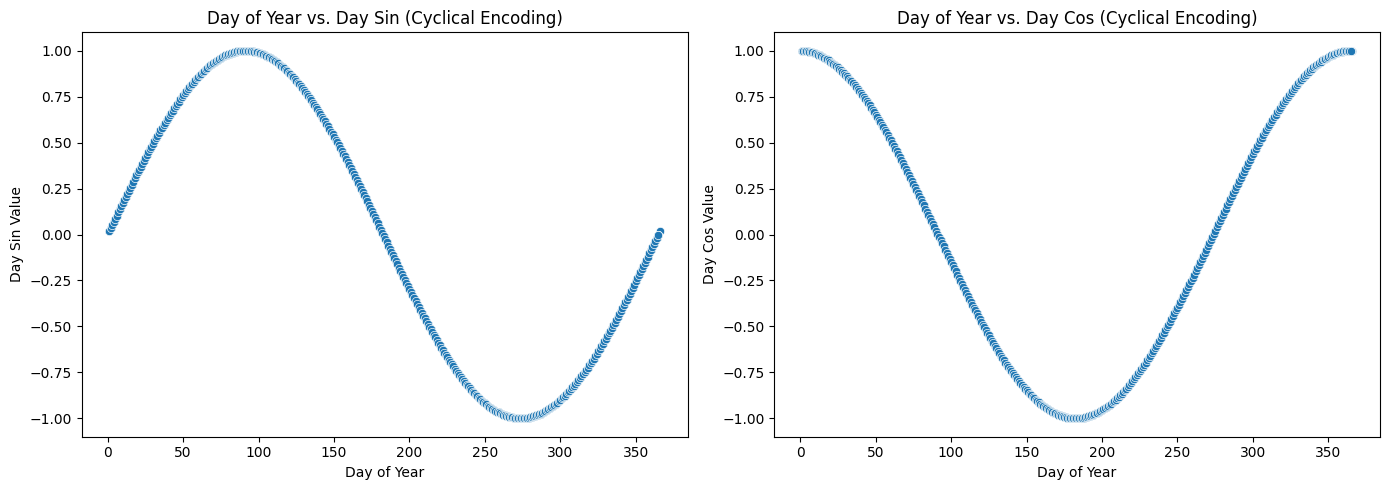

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.scatterplot(x='dayofyear', y='day_sin', data=data, ax=axes[0])
axes[0].set_title('Day of Year vs. Day Sin (Cyclical Encoding)')
axes[0].set_xlabel('Day of Year')
axes[0].set_ylabel('Day Sin Value')

sns.scatterplot(x='dayofyear', y='day_cos', data=data, ax=axes[1])
axes[1].set_title('Day of Year vs. Day Cos (Cyclical Encoding)')
axes[1].set_xlabel('Day of Year')
axes[1].set_ylabel('Day Cos Value')

plt.tight_layout()
plt.show()

In [ ]:
data.drop(['dayofyear', 'date'], axis=1, inplace = True)
data.head()

,precipitation,temp_max,temp_min,wind,weather,day_sin,day_cos
0,0.0,12.8,5.0,4.7,drizzle,0.017213,0.999852
1,10.9,10.6,2.8,4.5,rain,0.034422,0.999407
2,0.8,11.7,7.2,2.3,rain,0.051620,0.998667
3,20.3,12.2,5.6,4.7,rain,0.068802,0.997630
4,1.3,8.9,2.8,6.1,rain,0.085965,0.996298


In [ ]:
data.dtypes

,0
precipitation,float64
temp_max,float64
temp_min,float64
wind,float64
weather,object
day_sin,float64
day_cos,float64


In [ ]:
#No null values
data.isnull().sum()

,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0
day_sin,0
day_cos,0


In [ ]:
#Convert from Celsius to Fahrenheit
data['temp_min'] = data['temp_min'] * 9/5 + 32
data['temp_max'] = data['temp_max'] * 9/5 + 32

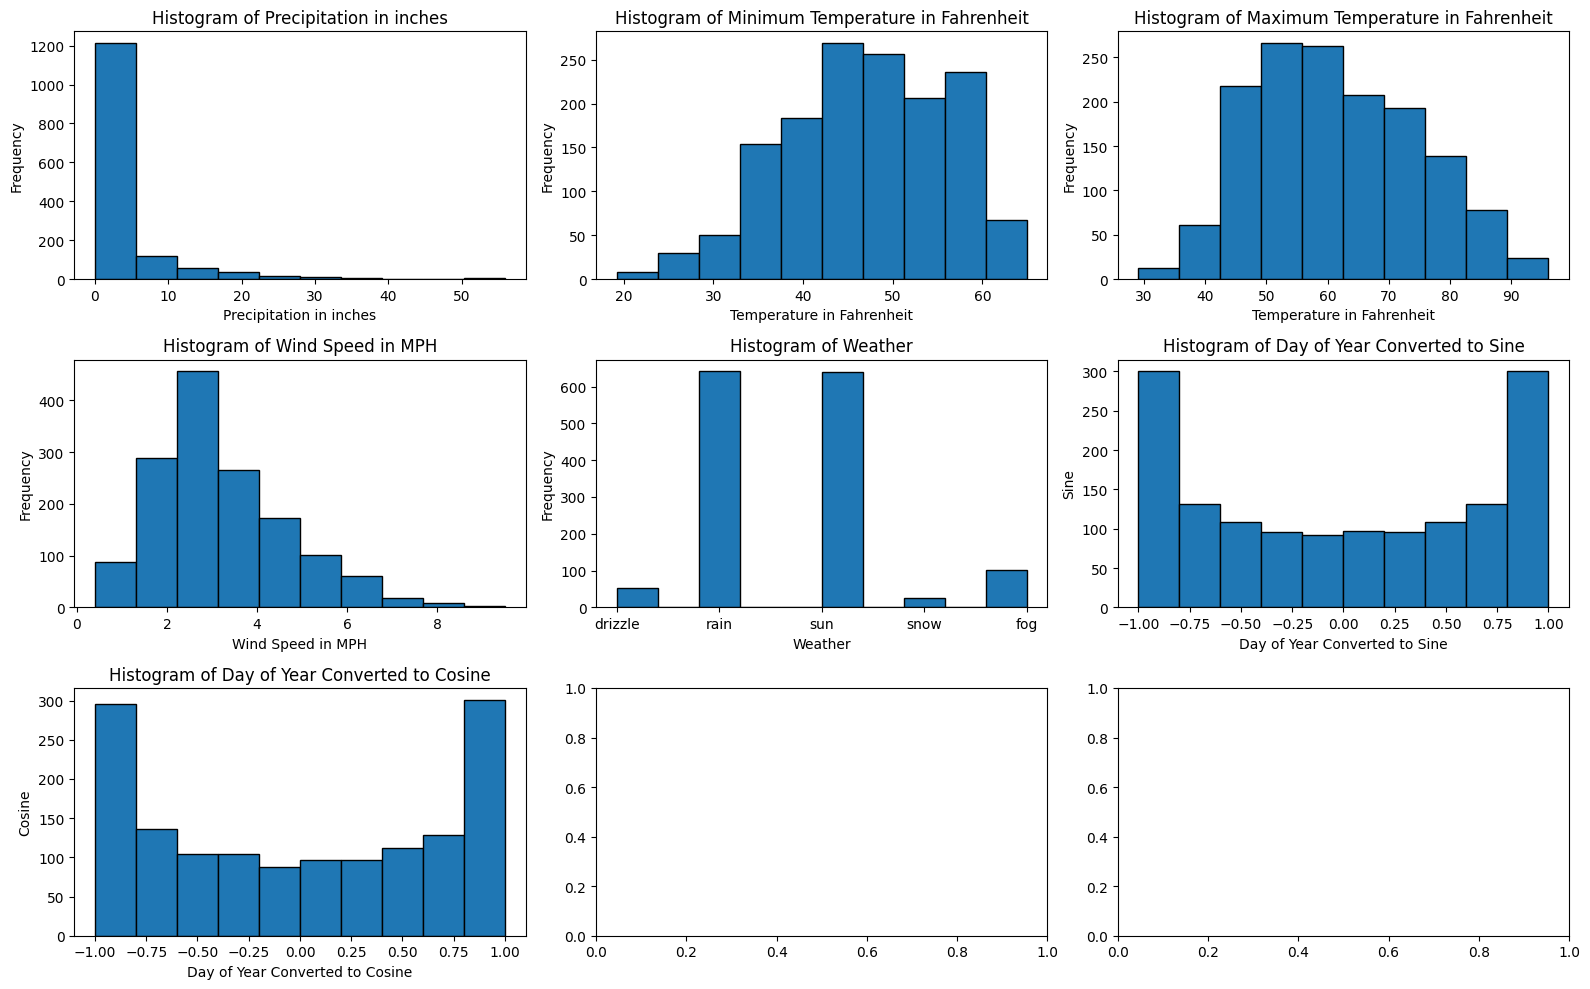

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(16, 10))

axes[0, 0].hist(data['precipitation'], edgecolor = 'black')
axes[0, 0].set_xlabel('Precipitation in inches')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Histogram of Precipitation in inches')

axes[0, 1].hist(data['temp_min'], edgecolor = 'black')
axes[0, 1].set_xlabel('Temperature in Fahrenheit')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Histogram of Minimum Temperature in Fahrenheit')

axes[0, 2].hist(data['temp_max'], edgecolor = 'black')
axes[0, 2].set_xlabel('Temperature in Fahrenheit')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Histogram of Maximum Temperature in Fahrenheit')

axes[1, 0].hist(data['wind'], edgecolor = 'black')
axes[1, 0].set_xlabel('Wind Speed in MPH')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Histogram of Wind Speed in MPH')

axes[1, 1].hist(data['weather'], edgecolor = 'black')
axes[1, 1].set_xlabel('Weather')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Histogram of Weather')

axes[1, 2].hist(data['day_sin'], edgecolor = 'black')
axes[1, 2].set_xlabel('Day of Year Converted to Sine')
axes[1, 2].set_ylabel('Sine')
axes[1, 2].set_title('Histogram of Day of Year Converted to Sine')

axes[2, 0].hist(data['day_cos'], edgecolor = 'black')
axes[2, 0].set_xlabel('Day of Year Converted to Cosine')
axes[2, 0].set_ylabel('Cosine')
axes[2, 0].set_title('Histogram of Day of Year Converted to Cosine')

plt.tight_layout()
plt.show()

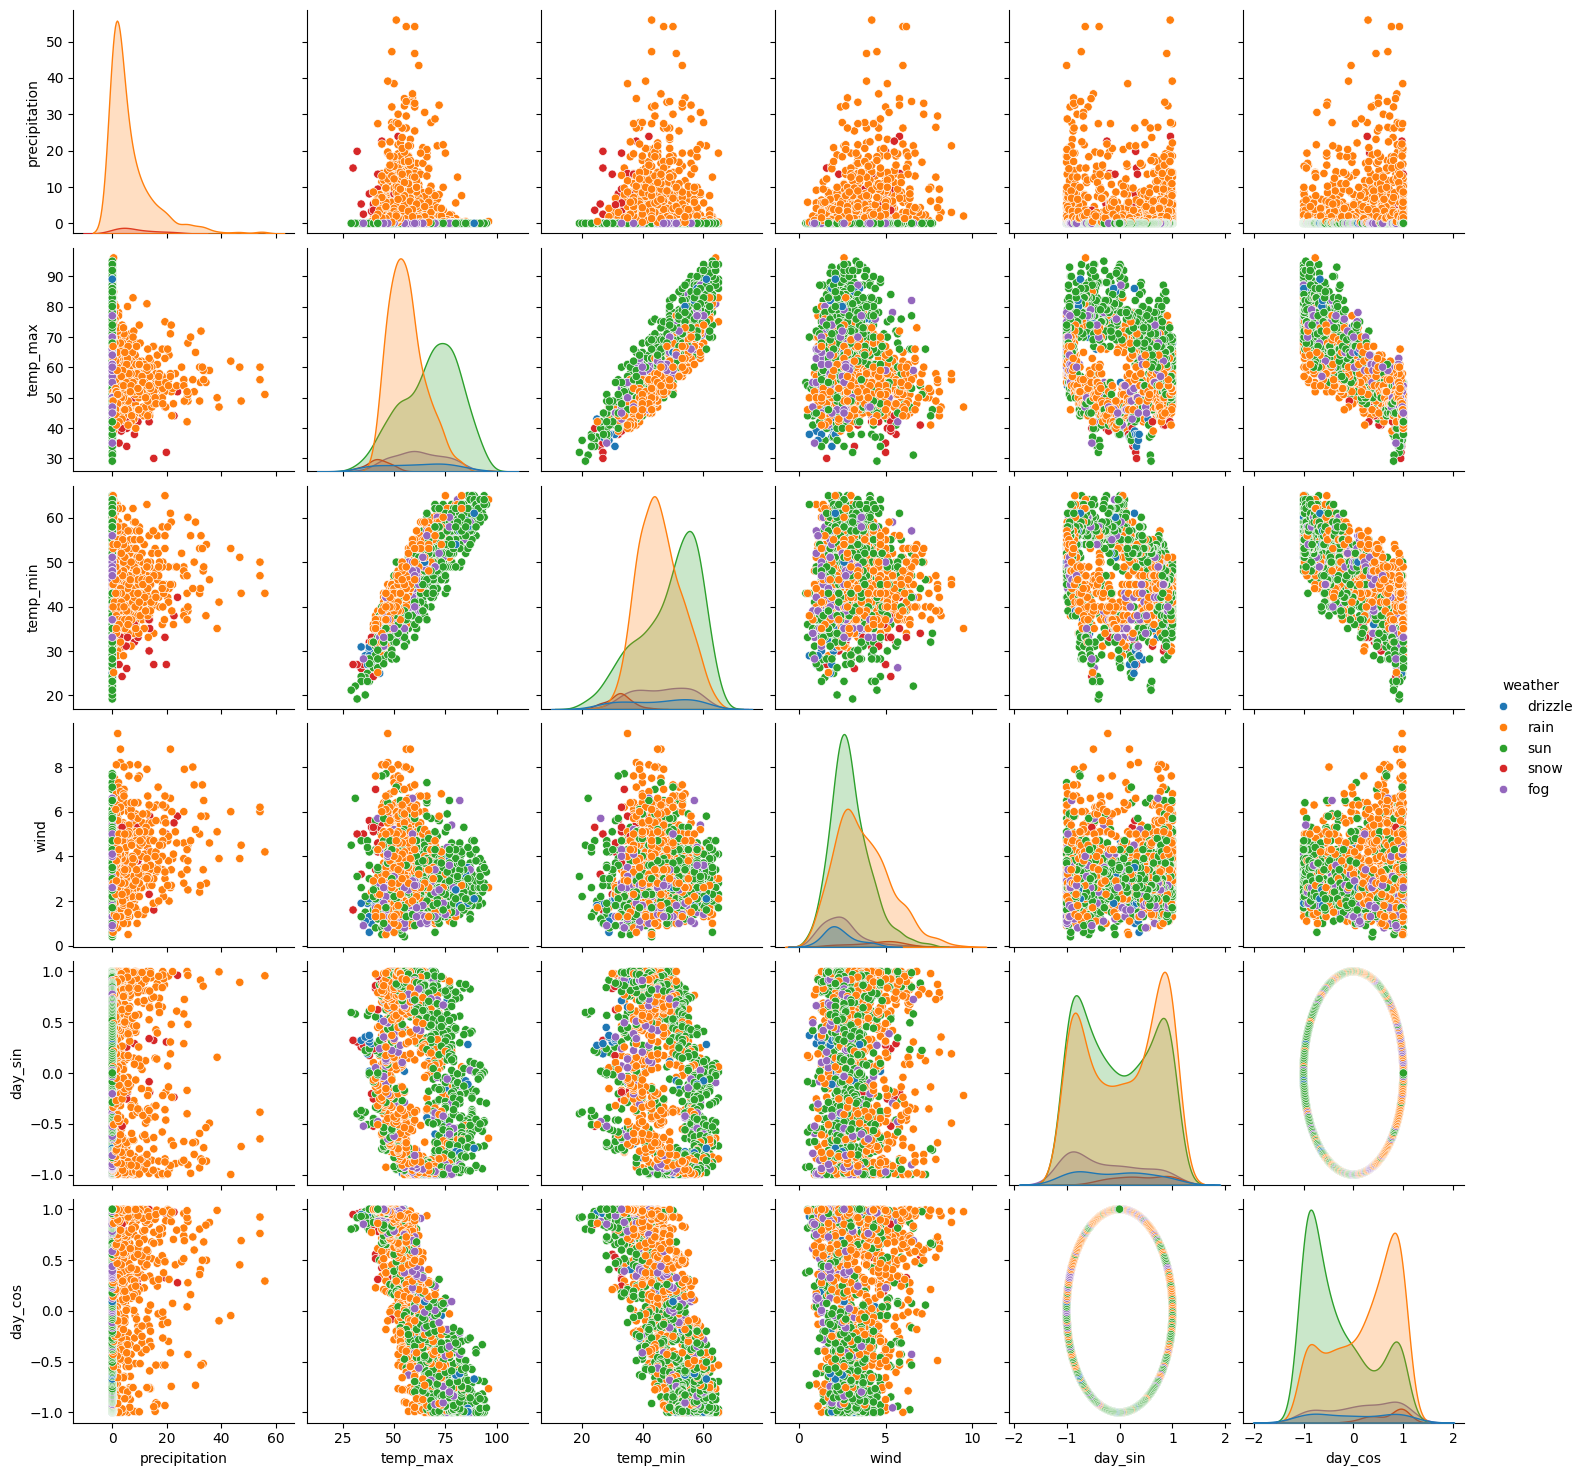

In [ ]:
sns.pairplot(data, hue = 'weather')

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

# chi2 requires non-negative values for numeric/categorical encoded features
target = data['weather']
features = data.drop('weather', axis=1)

features_scaled = MinMaxScaler().fit_transform(features)

chi_vals, p_vals = chi2(features_scaled, target)

In [ ]:
for i in range(len(chi_vals)):
  print(features.columns[i], 'chi-square value:', round(chi_vals[i], 4), 'p-value: ' + '<= ' + str(round(p_vals[i], 4)))
  print()

precipitation chi-square value: 94.8406 p-value: <= 0.0

temp_max chi-square value: 24.2922 p-value: <= 0.0001

temp_min chi-square value: 7.2635 p-value: <= 0.1226

wind chi-square value: 11.7612 p-value: <= 0.0192

day_sin chi-square value: 8.1291 p-value: <= 0.087

day_cos chi-square value: 51.7244 p-value: <= 0.0



At first glance, precipitation, max temperature, wind, and day_cos seem the most important.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

training_x, testing_x, training_y, testing_y = train_test_split(features, target, test_size = .2, random_state = 42)

**Modeling:**

**Softmax Regression (Generalization of Logistic Regression):**

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import warnings
import random

def classify_data(model):
  #Get rid of multi_class depreciated warning
  warnings.filterwarnings('ignore')
  #Set random seed
  random.seed(42)

  pipeline = make_pipeline(
      StandardScaler(),  # standardizes features
      model)

  results = cross_validate(pipeline, training_x, training_y, cv=5, scoring = ['accuracy', 'f1_weighted'])
  print(f"Mean Accuracy: {results['test_accuracy'].mean():.4f}")
  print(f"Mean Weighted F1-Score: {results['test_f1_weighted'].mean():.4f}")

In [ ]:
#Baseline/default model
classify_data(LogisticRegression(C = 1, multi_class = 'multinomial', solver = 'lbfgs', max_iter = 100))

Mean Accuracy: 0.7894
Mean Weighted F1-Score: 0.7438


In [ ]:
#Different C values:
c_values = [.0001, .001, .01, .1, 1, 10, 100, 1000]

for c in c_values:
  softmax_reg = LogisticRegression(C = c, solver = 'lbfgs', max_iter = 100)
  print(f'C: {c}')
  classify_data(softmax_reg)
  print()

C: 0.0001
Mean Accuracy: 0.6498
Mean Weighted F1-Score: 0.6080

C: 0.001
Mean Accuracy: 0.6713
Mean Weighted F1-Score: 0.6292

C: 0.01
Mean Accuracy: 0.7209
Mean Weighted F1-Score: 0.6760

C: 0.1
Mean Accuracy: 0.7611
Mean Weighted F1-Score: 0.7148

C: 1
Mean Accuracy: 0.7894
Mean Weighted F1-Score: 0.7438

C: 10
Mean Accuracy: 0.8245
Mean Weighted F1-Score: 0.7798

C: 100
Mean Accuracy: 0.8519
Mean Weighted F1-Score: 0.8050

C: 1000
Mean Accuracy: 0.8511
Mean Weighted F1-Score: 0.8044



C of 100 seems best

In [ ]:
#Default max_iter is 100

max_iter_values = [1, 10, 100, 1000, 10000]

for max_iter in max_iter_values:
  softmax_reg = LogisticRegression(C = 100, solver = 'lbfgs', max_iter = max_iter)
  print(f'Max Iterations: {max_iter}')
  classify_data(softmax_reg)
  print()

Max Iterations: 1
Mean Accuracy: 0.6593
Mean Weighted F1-Score: 0.6178

Max Iterations: 10
Mean Accuracy: 0.7731
Mean Weighted F1-Score: 0.7283

Max Iterations: 100
Mean Accuracy: 0.8519
Mean Weighted F1-Score: 0.8050

Max Iterations: 1000
Mean Accuracy: 0.8519
Mean Weighted F1-Score: 0.8050

Max Iterations: 10000
Mean Accuracy: 0.8519
Mean Weighted F1-Score: 0.8050



In [ ]:
#liblinear solver doesn't work with multinomial multiclass according to the documentation

solver_list = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

for solver in solver_list:
  softmax_reg = LogisticRegression(C = 100, solver = solver, max_iter = 100)
  print(f'Solver: {solver}')
  classify_data(softmax_reg)
  print()

Solver: lbfgs
Mean Accuracy: 0.8519
Mean Weighted F1-Score: 0.8050

Solver: liblinear
Mean Accuracy: 0.8219
Mean Weighted F1-Score: 0.7735

Solver: newton-cg
Mean Accuracy: 0.8519
Mean Weighted F1-Score: 0.8050

Solver: newton-cholesky
Mean Accuracy: 0.8519
Mean Weighted F1-Score: 0.8050

Solver: sag
Mean Accuracy: 0.8262
Mean Weighted F1-Score: 0.7818

Solver: saga
Mean Accuracy: 0.8134
Mean Weighted F1-Score: 0.7688



In [ ]:
l1_ratio_list = [None, 0, .15, .3, .5, .7, .85, 1]

for l1_ratio in l1_ratio_list:
  softmax_reg = LogisticRegression(C = 100, solver = 'lbfgs', max_iter = 100, l1_ratio = l1_ratio)
  print(f'L1 Ratio: {l1_ratio}')
  classify_data(softmax_reg)
  print()

L1 Ratio: None
Mean Accuracy: 0.8519
Mean Weighted F1-Score: 0.8050

L1 Ratio: 0
Mean Accuracy: 0.8519
Mean Weighted F1-Score: 0.8050

L1 Ratio: 0.15
Mean Accuracy: 0.8519
Mean Weighted F1-Score: 0.8050

L1 Ratio: 0.3
Mean Accuracy: 0.8519
Mean Weighted F1-Score: 0.8050

L1 Ratio: 0.5
Mean Accuracy: 0.8519
Mean Weighted F1-Score: 0.8050

L1 Ratio: 0.7
Mean Accuracy: 0.8519
Mean Weighted F1-Score: 0.8050

L1 Ratio: 0.85
Mean Accuracy: 0.8519
Mean Weighted F1-Score: 0.8050

L1 Ratio: 1
Mean Accuracy: 0.8519
Mean Weighted F1-Score: 0.8050



In [ ]:
classify_data(LogisticRegression(C = 100, solver = 'lbfgs', max_iter = 100, l1_ratio = None))
print()

classify_data(LogisticRegression(C = 100, solver = 'lbfgs', max_iter = 100, l1_ratio = None, class_weight='balanced'))

Mean Accuracy: 0.8519
Mean Weighted F1-Score: 0.8050

Mean Accuracy: 0.6593
Mean Weighted F1-Score: 0.7113


Softmax Regression Testing Performance

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score
pipeline = make_pipeline(StandardScaler(), LogisticRegression(C = 100, solver = 'lbfgs', max_iter = 100, l1_ratio = None))

pipeline.fit(training_x, training_y)

pred_y = pipeline.predict(testing_x)

accuracy = accuracy_score(testing_y, pred_y)
weighted_f1_score = f1_score(testing_y, pred_y, average='weighted')

print("\033[1m\n--- Final Softmax Model Performance on Test Set ---\033[0m")
print(f"\033[1m Accuracy: {accuracy:.4f}\033[0m")
print(f"\033[1m Weighted F1-Score: {weighted_f1_score:.4f}\033[0m")


--- Final Softmax Model Performance on Test Set ---
 Accuracy: 0.8328
 Weighted F1-Score: 0.7812


In [ ]:
print("\033[1m  This text is bold.   \033[0m")
print("This text is not bold.")

This text is bold.
This text is not bold.


**SVM**

In [ ]:
from sklearn.svm import LinearSVC

#Default hyperparameters for SVM
svm_model = LinearSVC(C = 1, max_iter=1000, tol=1e-4, random_state = 42)

classify_data(svm_model)

Mean Accuracy: 0.8014
Mean Weighted F1-Score: 0.7530


In [ ]:
c_values = [0.0001, .001, .01, .1, 1, 10, 100, 1000, 10000, 100000]

for c in c_values:
  # Changed to SVC with probability=True for soft voting
  svm_model = LinearSVC(C = c, max_iter=1000, tol=1e-4, random_state = 42)
  print(f'C: {c}')
  classify_data(svm_model)
  print()

C: 0.0001
Mean Accuracy: 0.6653
Mean Weighted F1-Score: 0.6235

C: 0.001
Mean Accuracy: 0.6952
Mean Weighted F1-Score: 0.6519

C: 0.01
Mean Accuracy: 0.7526
Mean Weighted F1-Score: 0.7062

C: 0.1
Mean Accuracy: 0.7740
Mean Weighted F1-Score: 0.7269

C: 1
Mean Accuracy: 0.8014
Mean Weighted F1-Score: 0.7530

C: 10
Mean Accuracy: 0.8262
Mean Weighted F1-Score: 0.7770

C: 100
Mean Accuracy: 0.8373
Mean Weighted F1-Score: 0.7874

C: 1000
Mean Accuracy: 0.8399
Mean Weighted F1-Score: 0.7898

C: 10000
Mean Accuracy: 0.8408
Mean Weighted F1-Score: 0.7905

C: 100000
Mean Accuracy: 0.8408
Mean Weighted F1-Score: 0.7905



In [ ]:
stopping_criteria_list = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]

for stopping_criteria in stopping_criteria_list:
  # Changed to SVC with probability=True for soft voting
  svm_model = LinearSVC(C = 10000, max_iter=1000, tol = stopping_criteria, random_state = 42)
  print(f'Stopping Criteria: {stopping_criteria}')
  classify_data(svm_model)
  print()

Stopping Criteria: 0.1
Mean Accuracy: 0.7654
Mean Weighted F1-Score: 0.7190

Stopping Criteria: 0.01
Mean Accuracy: 0.8339
Mean Weighted F1-Score: 0.7845

Stopping Criteria: 0.001
Mean Accuracy: 0.8391
Mean Weighted F1-Score: 0.7889

Stopping Criteria: 0.0001
Mean Accuracy: 0.8408
Mean Weighted F1-Score: 0.7905

Stopping Criteria: 1e-05
Mean Accuracy: 0.8408
Mean Weighted F1-Score: 0.7905

Stopping Criteria: 1e-06
Mean Accuracy: 0.8408
Mean Weighted F1-Score: 0.7905

Stopping Criteria: 1e-07
Mean Accuracy: 0.8408
Mean Weighted F1-Score: 0.7905



In [ ]:
#Default max iter is 1000
max_iter_values = [1, 10, 100, 1000, 10000]

for max_iter in max_iter_values:
  # Changed to SVC with probability=True for soft voting
  svm_model = LinearSVC(C = 10000, max_iter = max_iter, tol = 1e-4, random_state = 42)
  print(f'Max Iterations: {max_iter}')
  classify_data(svm_model)
  print()

Max Iterations: 1
Mean Accuracy: 0.7226
Mean Weighted F1-Score: 0.6776

Max Iterations: 10
Mean Accuracy: 0.8348
Mean Weighted F1-Score: 0.7850

Max Iterations: 100
Mean Accuracy: 0.8408
Mean Weighted F1-Score: 0.7905

Max Iterations: 1000
Mean Accuracy: 0.8408
Mean Weighted F1-Score: 0.7905

Max Iterations: 10000
Mean Accuracy: 0.8408
Mean Weighted F1-Score: 0.7905



In [ ]:
classify_data(LinearSVC(C = 10000, max_iter = max_iter, tol = 1e-4, random_state = 42))
print()

classify_data(LinearSVC(C = 10000, max_iter = max_iter, tol = 1e-4, random_state = 42, class_weight = 'balanced'))

Mean Accuracy: 0.8408
Mean Weighted F1-Score: 0.7905

Mean Accuracy: 0.8031
Mean Weighted F1-Score: 0.8055


In [ ]:
pipeline = make_pipeline(StandardScaler(), LinearSVC(C = 10000, max_iter = 100, tol = 1e-4, random_state = 42, class_weight = 'balanced'))

pipeline.fit(training_x, training_y)

pred_y = pipeline.predict(testing_x)

accuracy = accuracy_score(testing_y, pred_y)
weighted_f1_score = f1_score(testing_y, pred_y, average='weighted')

print("\033[1m\n--- Final SVM Model Performance on Test Set ---\033[0m")
print(f"\033[1mAccuracy: {accuracy:.4f}\033[0m")
print(f"\033[1mWeighted F1-Score: {weighted_f1_score:.4f}\033[0m")


--- Final SVM Model Performance on Test Set ---
Accuracy: 0.8259
Weighted F1-Score: 0.8214


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Default Parameters, using random_state = 42 for reproducibility
rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 100, min_samples_split = 2, min_samples_leaf = 1, random_state = 42)

classify_data(rf_model)

Mean Accuracy: 0.8562
Mean Weighted F1-Score: 0.8310


In [ ]:
max_depth_list = [i for i in range (1, 52, 5)]

for max_depth in max_depth_list:
  print(f'Max Depth: {max_depth}')
  rf_model = RandomForestClassifier(n_estimators = 100, max_depth = max_depth, min_samples_split = 2, min_samples_leaf = 1, random_state = 42)
  classify_data(rf_model)
  print()

Max Depth: 1
Mean Accuracy: 0.8511
Mean Weighted F1-Score: 0.8004

Max Depth: 6
Mean Accuracy: 0.8588
Mean Weighted F1-Score: 0.8168

Max Depth: 11
Mean Accuracy: 0.8630
Mean Weighted F1-Score: 0.8368

Max Depth: 16
Mean Accuracy: 0.8579
Mean Weighted F1-Score: 0.8345

Max Depth: 21
Mean Accuracy: 0.8562
Mean Weighted F1-Score: 0.8310

Max Depth: 26
Mean Accuracy: 0.8562
Mean Weighted F1-Score: 0.8310

Max Depth: 31
Mean Accuracy: 0.8562
Mean Weighted F1-Score: 0.8310

Max Depth: 36
Mean Accuracy: 0.8562
Mean Weighted F1-Score: 0.8310

Max Depth: 41
Mean Accuracy: 0.8562
Mean Weighted F1-Score: 0.8310

Max Depth: 46
Mean Accuracy: 0.8562
Mean Weighted F1-Score: 0.8310

Max Depth: 51
Mean Accuracy: 0.8562
Mean Weighted F1-Score: 0.8310



In [ ]:
num_tree_list = [1, 10, 100, 250, 500, 1000]

for num_tree in num_tree_list:
  print(f'Number of Trees: {num_tree}')
  rf_model = RandomForestClassifier(n_estimators = num_tree, max_depth = 11, min_samples_split = 2, min_samples_leaf = 1, random_state = 42)
  classify_data(rf_model)
  print()

Number of Trees: 1
Mean Accuracy: 0.7774
Mean Weighted F1-Score: 0.7741

Number of Trees: 10
Mean Accuracy: 0.8485
Mean Weighted F1-Score: 0.8256

Number of Trees: 100
Mean Accuracy: 0.8630
Mean Weighted F1-Score: 0.8368

Number of Trees: 250
Mean Accuracy: 0.8639
Mean Weighted F1-Score: 0.8353

Number of Trees: 500
Mean Accuracy: 0.8639
Mean Weighted F1-Score: 0.8353

Number of Trees: 1000
Mean Accuracy: 0.8639
Mean Weighted F1-Score: 0.8344



In [ ]:
min_samples_split_list = [i for i in range(2, 11)]

for min_samples_split in min_samples_split_list:
  print(f'Min Samples to Split an Internal Node: {min_samples_split}')
  rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 11, min_samples_split = min_samples_split, min_samples_leaf = 1, random_state = 42)
  classify_data(rf_model)
  print()

Min Samples to Split an Internal Node: 2
Mean Accuracy: 0.8630
Mean Weighted F1-Score: 0.8368

Min Samples to Split an Internal Node: 3
Mean Accuracy: 0.8665
Mean Weighted F1-Score: 0.8366

Min Samples to Split an Internal Node: 4
Mean Accuracy: 0.8648
Mean Weighted F1-Score: 0.8350

Min Samples to Split an Internal Node: 5
Mean Accuracy: 0.8648
Mean Weighted F1-Score: 0.8357

Min Samples to Split an Internal Node: 6
Mean Accuracy: 0.8665
Mean Weighted F1-Score: 0.8369

Min Samples to Split an Internal Node: 7
Mean Accuracy: 0.8656
Mean Weighted F1-Score: 0.8340

Min Samples to Split an Internal Node: 8
Mean Accuracy: 0.8605
Mean Weighted F1-Score: 0.8272

Min Samples to Split an Internal Node: 9
Mean Accuracy: 0.8639
Mean Weighted F1-Score: 0.8318

Min Samples to Split an Internal Node: 10
Mean Accuracy: 0.8596
Mean Weighted F1-Score: 0.8231



In [ ]:
min_samples_leaf_node_list = [i for i in range (1, 11, 1)]

for min_samples_leaf in min_samples_leaf_node_list:
  print(f'Min Samples Required to be a Leaf Node: {min_samples_leaf}')
  rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 11, min_samples_split = 6, min_samples_leaf = min_samples_leaf, random_state = 42)
  classify_data(rf_model)
  print()

Min Samples Required to be a Leaf Node: 1
Mean Accuracy: 0.8665
Mean Weighted F1-Score: 0.8369

Min Samples Required to be a Leaf Node: 2
Mean Accuracy: 0.8656
Mean Weighted F1-Score: 0.8348

Min Samples Required to be a Leaf Node: 3
Mean Accuracy: 0.8639
Mean Weighted F1-Score: 0.8317

Min Samples Required to be a Leaf Node: 4
Mean Accuracy: 0.8630
Mean Weighted F1-Score: 0.8276

Min Samples Required to be a Leaf Node: 5
Mean Accuracy: 0.8588
Mean Weighted F1-Score: 0.8170

Min Samples Required to be a Leaf Node: 6
Mean Accuracy: 0.8562
Mean Weighted F1-Score: 0.8133

Min Samples Required to be a Leaf Node: 7
Mean Accuracy: 0.8545
Mean Weighted F1-Score: 0.8075

Min Samples Required to be a Leaf Node: 8
Mean Accuracy: 0.8528
Mean Weighted F1-Score: 0.8049

Min Samples Required to be a Leaf Node: 9
Mean Accuracy: 0.8536
Mean Weighted F1-Score: 0.8056

Min Samples Required to be a Leaf Node: 10
Mean Accuracy: 0.8528
Mean Weighted F1-Score: 0.8039



In [ ]:
class_weight_list = [None, 'balanced', 'balanced_subsample']

for class_weight in class_weight_list:
  print(f'Class Weight: {class_weight}')
  rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 11, min_samples_split = 6, min_samples_leaf = 1, random_state = 42, class_weight = class_weight)
  classify_data(rf_model)
  print()

Class Weight: None
Mean Accuracy: 0.8665
Mean Weighted F1-Score: 0.8369

Class Weight: balanced
Mean Accuracy: 0.8459
Mean Weighted F1-Score: 0.8343

Class Weight: balanced_subsample
Mean Accuracy: 0.8408
Mean Weighted F1-Score: 0.8292



In [ ]:
pipeline = make_pipeline(StandardScaler(), \
                         RandomForestClassifier(n_estimators = 100, max_depth = 11, min_samples_split = 6, min_samples_leaf = 1, random_state = 42))

pipeline.fit(training_x, training_y)

pred_y = pipeline.predict(testing_x)

accuracy = accuracy_score(testing_y, pred_y)
weighted_f1_score = f1_score(testing_y, pred_y, average='weighted')

print("\033[1m\n--- Final Random Forest Model Performance on Test Set ---\033[0m")
print(f"\033[1mAccuracy: {accuracy:.4f}\033[0m")
print(f"\033[1mWeighted F1-Score: {weighted_f1_score:.4f}\033[0m")


--- Final Random Forest Model Performance on Test Set ---
Accuracy: 0.8464
Weighted F1-Score: 0.8085


In [ ]:
# Access the RandomForestClassifier inside the pipeline
rf_model = pipeline.named_steps['randomforestclassifier']

for feature_name, feature_importance in zip(training_x.columns.tolist(), rf_model.feature_importances_):
  print(f'{feature_name}, {feature_importance:4f}')

precipitation, 0.579233
temp_max, 0.111965
temp_min, 0.084910
wind, 0.062834
day_sin, 0.069893
day_cos, 0.091165


Feature Importance According to Best Random Forest:

1.   Precipitation (.579)
2.   Max Temperature in Fahrenheit (.112)
3.   Cosine of Day of Year (.091)
4.   Minimum Temperature in Fahrenheit (.085)
5.   Sine of Day of Year (.070)
6.   Wind Speed in mph (.063)

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB(var_smoothing = 1e-9)
classify_data(clf)

Mean Accuracy: 0.8297
Mean Weighted F1-Score: 0.8100


In [ ]:
var_smoothing_list = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11]

for var_smoothing in var_smoothing_list:
  print(f'Variance Smoothing: {var_smoothing}')
  clf = GaussianNB(var_smoothing = var_smoothing)
  classify_data(clf)
  print()

Variance Smoothing: 0.001
Mean Accuracy: 0.7689
Mean Weighted F1-Score: 0.7534

Variance Smoothing: 0.0001
Mean Accuracy: 0.8245
Mean Weighted F1-Score: 0.8051

Variance Smoothing: 1e-05
Mean Accuracy: 0.8280
Mean Weighted F1-Score: 0.8085

Variance Smoothing: 1e-06
Mean Accuracy: 0.8297
Mean Weighted F1-Score: 0.8100

Variance Smoothing: 1e-07
Mean Accuracy: 0.8297
Mean Weighted F1-Score: 0.8100

Variance Smoothing: 1e-08
Mean Accuracy: 0.8297
Mean Weighted F1-Score: 0.8100

Variance Smoothing: 1e-09
Mean Accuracy: 0.8297
Mean Weighted F1-Score: 0.8100

Variance Smoothing: 1e-10
Mean Accuracy: 0.8297
Mean Weighted F1-Score: 0.8100

Variance Smoothing: 1e-11
Mean Accuracy: 0.8297
Mean Weighted F1-Score: 0.8100



In [ ]:
pipeline = make_pipeline(StandardScaler(), \
                         GaussianNB(var_smoothing = 1e-9))

pipeline.fit(training_x, training_y)

pred_y = pipeline.predict(testing_x)

accuracy = accuracy_score(testing_y, pred_y)
weighted_f1_score = f1_score(testing_y, pred_y, average='weighted')

print("\033[1m\n--- Final Gaussian Naive Bayes Performance on Test Set ---\033[0m")
print(f"\033[1mAccuracy: {accuracy:.4f}\033[0m")
print(f"\033[1mWeighted F1-Score: {weighted_f1_score:.4f}\033[0m")


--- Final Gaussian Naive Bayes Performance on Test Set ---
Accuracy: 0.8362
Weighted F1-Score: 0.8082


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
classify_data(knn)

Mean Accuracy: 0.7020
Mean Weighted F1-Score: 0.6902


In [ ]:
neighbors_list = [i for i in range(1, 11)]

for neighbors in neighbors_list:
  print(f'Number of Neighbors: {neighbors}')
  knn = KNeighborsClassifier(n_neighbors=neighbors)
  classify_data(knn)
  print()

Number of Neighbors: 1
Mean Accuracy: 0.6661
Mean Weighted F1-Score: 0.6655

Number of Neighbors: 2
Mean Accuracy: 0.6147
Mean Weighted F1-Score: 0.6224

Number of Neighbors: 3
Mean Accuracy: 0.6858
Mean Weighted F1-Score: 0.6903

Number of Neighbors: 4
Mean Accuracy: 0.7141
Mean Weighted F1-Score: 0.7004

Number of Neighbors: 5
Mean Accuracy: 0.7020
Mean Weighted F1-Score: 0.6902

Number of Neighbors: 6
Mean Accuracy: 0.6986
Mean Weighted F1-Score: 0.6821

Number of Neighbors: 7
Mean Accuracy: 0.6995
Mean Weighted F1-Score: 0.6797

Number of Neighbors: 8
Mean Accuracy: 0.7183
Mean Weighted F1-Score: 0.6932

Number of Neighbors: 9
Mean Accuracy: 0.7081
Mean Weighted F1-Score: 0.6833

Number of Neighbors: 10
Mean Accuracy: 0.7201
Mean Weighted F1-Score: 0.6929



In [ ]:
print('Uniform Weights:')
knn = KNeighborsClassifier(n_neighbors=4, weights = 'uniform')
classify_data(knn)
print()

print('Weights Using Distance:')
knn = KNeighborsClassifier(n_neighbors=4, weights = 'distance')
classify_data(knn)

Uniform Weights:
Mean Accuracy: 0.7141
Mean Weighted F1-Score: 0.7004

Weights Using Distance:
Mean Accuracy: 0.7158
Mean Weighted F1-Score: 0.7013


In [ ]:
algorithm_list = ['auto', 'ball_tree', 'kd_tree', 'brute']

for algorithm in algorithm_list:
  print(f'Algorithm: {algorithm}')
  knn = KNeighborsClassifier(n_neighbors=4, weights = 'distance', algorithm = algorithm)
  classify_data(knn)
  print()

Algorithm: auto
Mean Accuracy: 0.7158
Mean Weighted F1-Score: 0.7013

Algorithm: ball_tree
Mean Accuracy: 0.7158
Mean Weighted F1-Score: 0.7013

Algorithm: kd_tree
Mean Accuracy: 0.7158
Mean Weighted F1-Score: 0.7013

Algorithm: brute
Mean Accuracy: 0.7158
Mean Weighted F1-Score: 0.7013



In [ ]:
print('KNN Using Manhattan Distance:')
knn = KNeighborsClassifier(n_neighbors=4, weights = 'distance', algorithm = 'auto', p = 1)
classify_data(knn)
print()

print('KNN Using Euclidean Distance:')
knn = KNeighborsClassifier(n_neighbors=4, weights = 'distance', algorithm = 'auto', p = 2)
classify_data(knn)

KNN Using Manhattan Distance:
Mean Accuracy: 0.7320
Mean Weighted F1-Score: 0.7195

KNN Using Euclidean Distance:
Mean Accuracy: 0.7158
Mean Weighted F1-Score: 0.7013


In [ ]:
pipeline = make_pipeline(StandardScaler(), \
                         KNeighborsClassifier(n_neighbors=4, weights = 'distance', algorithm = 'auto', p = 1))

pipeline.fit(training_x, training_y)

pred_y = pipeline.predict(testing_x)

accuracy = accuracy_score(testing_y, pred_y)
weighted_f1_score = f1_score(testing_y, pred_y, average='weighted')

print("\033[1m\n--- Final K-Nearest Neighbors Performance on Test Set ---\033[0m")
print(f"\033[1mAccuracy: {accuracy:.4f}\033[0m")
print(f"\033[1mWeighted F1-Score: {weighted_f1_score:.4f}\033[0m")


--- Final K-Nearest Neighbors Performance on Test Set ---
Accuracy: 0.7406
Weighted F1-Score: 0.7208


**Individual Classifier Testing Performance:**

In [ ]:
def test_model(model):
  pipeline = make_pipeline(StandardScaler(), model)

  pipeline.fit(training_x, training_y)

  pred_y = pipeline.predict(testing_x)

  accuracy = accuracy_score(testing_y, pred_y)
  weighted_f1_score = f1_score(testing_y, pred_y, average='weighted')

# print("\n--- Final K-Nearest Neighbors Performance on Test Set ---")
  print(f"Accuracy: {accuracy:.4f}")
  print(f"Weighted F1-Score: {weighted_f1_score:.4f}")


In [ ]:
softmax_reg = LogisticRegression(C = 100, solver = 'lbfgs', max_iter = 100, l1_ratio = None)
svm_model = LinearSVC(C = 10000, max_iter = 100, tol = 1e-4, random_state = 42, class_weight = 'balanced')
rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 11, min_samples_split = 6, min_samples_leaf = 1, random_state = 42)
nb_model = GaussianNB(var_smoothing = 1e-9)
knn_model = KNeighborsClassifier(n_neighbors=4, weights = 'distance', algorithm = 'auto', p = 1)

print('\033[1mBest Softmax Regression Model Testing Performance:\033[0m')
test_model(softmax_reg)
print()

print('\033[1mBest SVM Model Testing Performance:\033[0m')
test_model(svm_model)
print()

print('\033[1mBest Random Forest Model Testing Performance:\033[0m')
test_model(rf_model)
print()

print('\033[1mBest Naive Bayes Model Testing Performance:\033[0m')
test_model(nb_model)
print()

print('\033[1mBest KNN Model Testing Performance:\033[0m')
test_model(knn_model)

Best Softmax Regression Model Testing Performance:
Accuracy: 0.8328
Weighted F1-Score: 0.7812

Best SVM Model Testing Performance:
Accuracy: 0.8259
Weighted F1-Score: 0.8214

Best Random Forest Model Testing Performance:
Accuracy: 0.8464
Weighted F1-Score: 0.8085

Best Naive Bayes Model Testing Performance:
Accuracy: 0.8362
Weighted F1-Score: 0.8082

Best KNN Model Testing Performance:
Accuracy: 0.7406
Weighted F1-Score: 0.7208


Rankings of Individual Model Performance on Testing Set (Based on Mean Weighted F1-Score):

*   1. SVM (.8214)
*   2. Random Forest (.8085)
*   3. Naive Bayes (.8082)
*   4. Softmax Regression (.7812)
*   5. K-Narest Neighbors (.7208)

**Ensemble Learning (Combined Models)**

Hard Voting Tuning Parameters

In [ ]:
from sklearn.ensemble import VotingClassifier

#Hard Voting with all 5 models
voting_clf = VotingClassifier(estimators = \
 [('Softmax', softmax_reg), ('SVM', svm_model), ('RF', rf_model), ('NB', nb_model), ('KNN', knn_model)], voting = 'hard')

print('Hard Voting Validation Performance with all 5 models:')
classify_data(voting_clf)

Hard Voting Validation Performance with all 5 models:
Mean Accuracy: 0.8605
Mean Weighted F1-Score: 0.8317


In [ ]:
#Hard Voting with top 3 models
voting_clf = VotingClassifier(estimators = \
 [('SVM', svm_model), ('RF', rf_model), ('NB', nb_model)], voting = 'hard')

print('Hard Voting Validation Performance with top 3 models:')
classify_data(voting_clf)

Hard Voting Validation Performance with top 3 models:
Mean Accuracy: 0.8468
Mean Weighted F1-Score: 0.8311


In [ ]:
#Hard Voting with top 3 models
voting_clf = VotingClassifier(estimators = \
 [('Softmax', softmax_reg), ('SVM', svm_model), ('RF', rf_model), ('NB', nb_model)], voting = 'hard')

print('Hard Voting Validation Performance with top 4 models:')
classify_data(voting_clf)

Hard Voting Validation Performance with top 4 models:
Mean Accuracy: 0.8519
Mean Weighted F1-Score: 0.8282


In [ ]:
#Best Hard Voting Model:

#Hard Voting with all 5 models
voting_clf = VotingClassifier(estimators = \
 [('Softmax', softmax_reg), ('SVM', svm_model), ('RF', rf_model), ('NB', nb_model), ('KNN', knn_model)], voting = 'hard')

print('Best Hard Voting Model, with all 5 models, Testing Performance:')
test_model(voting_clf)

Best Hard Voting Model, with all 5 models, Testing Performance:
Accuracy: 0.8396
Weighted F1-Score: 0.8038


Testing with all model class_weights set to balanced seems to dramatically improve testing performance for Ensemble Learning.

In [ ]:
softmax_reg = LogisticRegression(C = 100, solver = 'lbfgs', max_iter = 100, l1_ratio = None, class_weight = 'balanced')
svm_model = LinearSVC(C = 10000, max_iter = 100, tol = 1e-4, random_state = 42, class_weight = 'balanced')
rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 11, min_samples_split = 6, min_samples_leaf = 1, random_state = 42, class_weight = 'balanced')
nb_model = GaussianNB(var_smoothing = 1e-9)
knn_model = KNeighborsClassifier(n_neighbors=4, weights = 'distance', algorithm = 'auto', p = 1)

#Best Hard Voting Model with all class_weight = 'balanced':
voting_clf = VotingClassifier(estimators = \
 [('Softmax', softmax_reg), ('SVM', svm_model), ('RF', rf_model), ('NB', nb_model), ('KNN', knn_model)], voting = 'hard')

print('\033[1mBest Hard Voting Model, with all 5 models, and all class_weights set to "balanced" Testing Performance:\033[0m')
#test_model(voting_clf)
print('\033[1mAccuracy: 0.8464\033[0m')
print('\033[1mWeighted F1-Score: 0.8405\033[0m')

Best Hard Voting Model, with all 5 models, and all class_weights set to "balanced" Testing Performance:
Accuracy: 0.8464
Weighted F1-Score: 0.8405


Tune Soft Voting Parameters

In [ ]:
#Gives Probabilities to Linear SVC, so it can be used for soft voting
from sklearn.calibration import CalibratedClassifierCV

calibrated_svm_model = CalibratedClassifierCV(svm_model, cv = 5, method = 'isotonic')

In [ ]:
#Soft Voting with all 5 models

print('Soft Voting Validation Performance with all 5 models')
voting_clf = VotingClassifier(estimators = \
 [('Softmax', softmax_reg), ('Calibrated SVM', calibrated_svm_model), ('RF', rf_model), ('NB', nb_model), ('KNN', knn_model)], voting = 'soft')

classify_data(voting_clf)

Soft Voting Validation Performance with all 5 models
Mean Accuracy: 0.8571
Mean Weighted F1-Score: 0.8367


In [ ]:
#Soft Voting with top 3 models

print('Soft Voting Validation Performance with top 3 models')
voting_clf = VotingClassifier(estimators = \
 [('Calibrated SVM', calibrated_svm_model), ('RF', rf_model), ('NB', nb_model)], voting = 'soft')

classify_data(voting_clf)

Soft Voting Validation Performance with top 3 models
Mean Accuracy: 0.8545
Mean Weighted F1-Score: 0.8205


In [ ]:
#Soft Voting with top 4 models

print('Soft Voting Validation Performance with top 4 models')
voting_clf = VotingClassifier(estimators = \
 [('Softmax', softmax_reg), ('Calibrated SVM', calibrated_svm_model), ('RF', rf_model), ('NB', nb_model)], voting = 'soft')

classify_data(voting_clf)

Soft Voting Validation Performance with top 4 models
Mean Accuracy: 0.8485
Mean Weighted F1-Score: 0.8345


In [ ]:
#Best Soft Hard Voting Model:

#Soft Voting with all 5 Models
voting_clf = VotingClassifier(estimators = \
 [('Softmax', softmax_reg), ('Calibrated SVM', calibrated_svm_model), ('RF', rf_model), ('NB', nb_model), ('KNN', knn_model)], voting = 'soft')

print('\033[1mBest Soft Voting Model, with all 5 models and all class_weights = "balanced", Testing Performance\033[0m')
print('\033[1mAccuracy: 0.8635\033[0m')
print('\033[1mWeighted F1-Score: 0.8441\033[0m')
test_model(voting_clf)

Best Soft Voting Model, with all 5 models and all class_weights = "balanced", Testing Performance
Accuracy: 0.8635
Weighted F1-Score: 0.8441
Accuracy: 0.8635
Weighted F1-Score: 0.8441


All Model Final Testing Performances:

In [ ]:
softmax_reg = LogisticRegression(C = 100, solver = 'lbfgs', max_iter = 100, l1_ratio = None)
svm_model = LinearSVC(C = 10000, max_iter = 100, tol = 1e-4, random_state = 42, class_weight = 'balanced')
rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 11, min_samples_split = 6, min_samples_leaf = 1, random_state = 42)
nb_model = GaussianNB(var_smoothing = 1e-9)
knn_model = KNeighborsClassifier(n_neighbors=4, weights = 'distance', algorithm = 'auto', p = 1)

print('Best Softmax Regression Model Testing Performance:')
test_model(softmax_reg)
print()

print('Best SVM Model Testing Performance:')
test_model(svm_model)
print()

print('Best Random Forest Model Testing Performance:')
test_model(rf_model)
print()

print('Best Naive Bayes Model Testing Performance:')
test_model(nb_model)
print()

print('Best KNN Model Testing Performance:')
test_model(knn_model)
print()

balanced_softmax_reg = LogisticRegression(C = 100, solver = 'lbfgs', max_iter = 100, l1_ratio = None, class_weight = 'balanced')
balanced_svm_model = LinearSVC(C = 10000, max_iter = 100, tol = 1e-4, random_state = 42, class_weight = 'balanced')
balanced_rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 11, min_samples_split = 6, min_samples_leaf = 1, random_state = 42, class_weight = 'balanced')
calibrated_svm_model = CalibratedClassifierCV(balanced_svm_model, cv = 5, method = 'isotonic')

hard_voting_clf = VotingClassifier(estimators = \
 [('Softmax', balanced_softmax_reg), ('SVM', balanced_svm_model), ('RF', balanced_rf_model), ('NB', nb_model), ('KNN', knn_model)], voting = 'hard')

soft_voting_clf = VotingClassifier(estimators = \
 [('Softmax', balanced_softmax_reg), ('SVM', calibrated_svm_model), ('RF', balanced_rf_model), ('NB', nb_model), ('KNN', knn)], voting = 'soft')

print('Best Hard Voting Model Testing Performance:')
test_model(hard_voting_clf)
print()

print('Best Soft Voting Model Testing Performance:')
test_model(soft_voting_clf)

Best Softmax Regression Model Testing Performance:
Accuracy: 0.8328
Weighted F1-Score: 0.7812

Best SVM Model Testing Performance:
Accuracy: 0.8259
Weighted F1-Score: 0.8214

Best Random Forest Model Testing Performance:
Accuracy: 0.8464
Weighted F1-Score: 0.8085

Best Naive Bayes Model Testing Performance:
Accuracy: 0.8362
Weighted F1-Score: 0.8082

Best KNN Model Testing Performance:
Accuracy: 0.7406
Weighted F1-Score: 0.7208

Best Hard Voting Model Testing Performance:
Accuracy: 0.8464
Weighted F1-Score: 0.8405

Best Soft Voting Model Testing Performance:
Accuracy: 0.8635
Weighted F1-Score: 0.8463


**Rankings of all model performance on Testing Set (Based on Mean Weighted F1-Score):**

*   **1. Soft Voting (.8463)**
*   **2. Hard Voting (.8405)**
*   **3. SVM (.8214)**
*   **4. Random Forest (.8085)**
*   **5. Naive Bayes (.8082)**
*   **6. Softmax Regression (.7812)**
*   **7. K-Narest Neighbors (.7208)**

